# HLMA 408: Lois gaussiennes et visualisation interactive

***
> __Auteur__: Joseph Salmon <joseph.salmon@umontpellier.fr>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm, multivariate_normal
from ipywidgets import interact  # widget manipulation
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # pour activer la 3D

In [2]:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

**Attention** : décommenter la partie LaTeX ci-dessous, si vous n'avez pas LaTeX sur votre système

In [3]:
Eleve = False  # à changer en True pour un étudiant

title_font = {'size': '16'}
axis_font = {'size': '14'}

if not Eleve:
    from matplotlib import rc
    rc('text', usetex=True)
    font = {'family': 'sans-serif'}
    rc('font', **font)
    saving = True
    from download import download
else:
    saving = False

In [4]:
dirname = "../prebuiltimages/"
imageformat = ".pdf"

In [5]:
# pip install download

# si download n'est pas installé décommenter la ligne du dessus, ou télécharger le fichier à la main
from download import download
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.



## Visualisation des densités gaussiennes: impact des paramètres de centrage ($\mu$) et de dispersion ($\sigma$)

In [6]:
x = np.linspace(-5, 5, num=400)

In [7]:
def gaussian_mean_and_std(mean=0, std=1):
    """Visualize the Gaussian quantile"""
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x, norm.pdf(x, mean, std), '-', lw=2,
             label=r"$\varphi_{\mu, \sigma}$")
    ax1.set_ylim(0, 1)
    ax1.set_title(r"Densité d'une loi gaussienne en fonction des paramètres:" + "\n" +
                  r" Centrage $\mu = {0:.2f}$,  Dispersion: $\sigma = {1:.2f}$".format(mean, std), **title_font)
    plt.legend()
    plt.show()

In [8]:
interact(gaussian_mean_and_std, mean=(-3., 3., 0.01), std=(0.1, 4, 0.05))

interactive(children=(FloatSlider(value=0.0, description='mean', max=3.0, min=-3.0, step=0.01), FloatSlider(va…

<function __main__.gaussian_mean_and_std(mean=0, std=1)>

# Visualisation de la fonction de répartition gaussienne

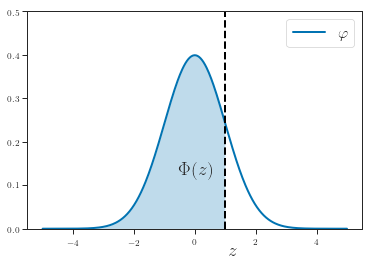

In [9]:
val = 1
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.plot(x, norm.pdf(x, 0, 1), '-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= val, alpha=0.25)
plt.axvline(x=val, c='k', ls="--", lw=2)
ax1.text(0.45, 0.25, r'$\Phi(z)$', transform=ax1.transAxes, fontsize=19)
ax1.text(0.60, -0.12, r'$z$', transform=ax1.transAxes, fontsize=19)

plt.legend(prop={'size': 16})
plt.show()
my_saving_display(fig, dirname, "Gaussian_CDF",
                  imageformat, saving=saving)

## Visualisation des quantiles gaussiens

In [10]:
def gaussian_quantile(alpha=0.9, saving=False):
    """Visualisation des quantiles gaussiens."""

    val = norm.ppf(alpha, 0, 1)
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x, norm.pdf(x, 0, 1), '-', lw=2, label=r"$\varphi$")
    ax1.set_ylim(0, 0.5)
    ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= val, alpha=0.25)
    plt.axvline(x=val, c='k', ls="--", lw=2)
    ax1.set_title(r"Visualisation des quantiles:" + "\n" +
                  r"Aire $ \alpha = {0:.2f},$  seuil = $\Phi^{{-1}}(\alpha)={1:.2f}$".format(alpha, val), **title_font)
    plt.legend(prop={'size': 16})
    plt.show()
    my_saving_display(fig, dirname, "VisGaussianCDF_bis",
                      imageformat, saving=saving)

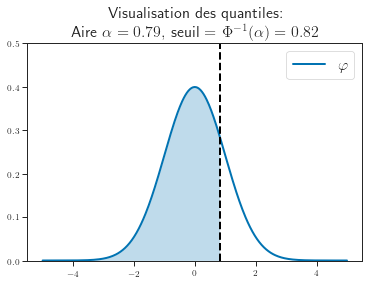

In [11]:
gaussian_quantile(alpha=norm.cdf(0.82, 0, 1), saving=True)

In [12]:
interact(gaussian_quantile, alpha=(0.01, .99, 0.01))

interactive(children=(FloatSlider(value=0.9, description='alpha', max=0.99, min=0.01, step=0.01), Checkbox(val…

<function __main__.gaussian_quantile(alpha=0.9, saving=False)>

## Figures pour les slides du cours

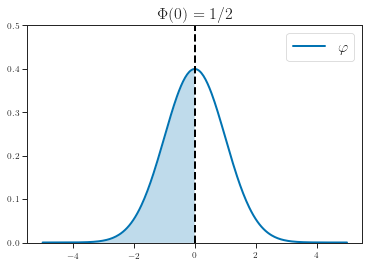

In [13]:
x = np.linspace(-5, 5, 300)

fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), '-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= 0, alpha=0.25)
plt.axvline(x=0, c='k', ls="--", lw=2)
plt.title("$\Phi(0)=1/2$", **title_font)
plt.legend(prop={'size': 16})

my_saving_display(fig, dirname, "Gaussian_phi0", imageformat, saving=saving)

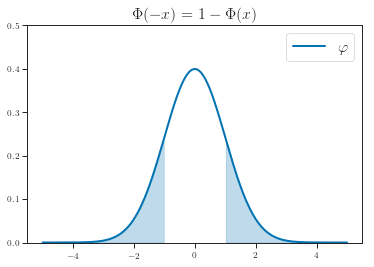

In [14]:
x = np.linspace(-5, 5, 300)

lim = 1
fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), '-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= -
                 lim, color=sns.color_palette()[0], alpha=0.25)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x >=
                 lim, color=sns.color_palette()[0], alpha=0.25)
plt.title("$\Phi(-x)=1-\Phi(x)$", **title_font)
plt.legend(prop={'size': 16})

my_saving_display(fig, dirname, "Gaussian_phi_moins_x",
                  imageformat, saving=saving)

In [15]:
norm.cdf(1, 0, 1)-norm.cdf(-1, 0, 1)

0.6826894921370859

In [16]:
2 * norm.cdf(1, 0, 1)-1

0.6826894921370859

In [17]:
2 * norm.cdf(2, 0, 1)-1

0.9544997361036416

### Histogramme et densité gaussienne : théorème de la limite centrale et données réelles

In [18]:
url = "http://josephsalmon.eu/enseignement/datasets/babies23.data"
# url = "http://www.stat.berkeley.edu/users/statlabs/data/babies23.data"  # backup url, without header.
path_target = "./babies23.data"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./babies23.data'

In [19]:
# le fichier peut être télécharger ici:
# http://josephsalmon.eu/enseignement/datasets/babies23.data
# et mis dans le repertoire de votre notebook
pd.set_option('precision', 3)  # set to display number at precision 0 in pandas
df_babies = pd.read_csv("babies23.data", skiprows=38,
                        sep='\s+')  # \s+ : for hanlding spaces
df_babies.head(n=10)  # df stands for Data Frame

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
0,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
1,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
2,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
3,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
4,72,5,1,1425,282,1,108,1,0,23,...,0,24,5,99,999,1,1,1,1,5
5,100,5,1,1673,286,1,136,4,0,25,...,3,28,2,64,130,1,4,2,2,2
6,102,5,1,1449,244,1,138,4,7,33,...,7,37,4,99,999,1,98,0,0,0
7,129,5,1,1562,245,1,132,2,7,23,...,7,23,4,71,192,1,2,0,0,0
8,142,5,1,1408,289,1,120,3,0,25,...,3,26,1,70,180,0,2,0,0,0
9,148,5,1,1568,299,1,143,3,0,30,...,0,34,5,99,999,1,2,1,1,4


In [20]:
is_preprocessing_done = 0  # init at 0,if greater don't redo it

In [21]:
if is_preprocessing_done < 1:
    print("You have to do the pre-processing only once, to avoid unit issues")

    # Gérer les valeurs manquantes (voir entête de babies23.data pour les détails)

    # Unknown gestation duration
    df_babies['gestation'].replace(999, np.nan, inplace=True)
    # Unknown smoking status of the mother
    df_babies['smoke'].replace(9, np.nan, inplace=True)
    # Mother's height
    df_babies['ht'].replace(99, np.nan, inplace=True)
    # Father's height
    df_babies['dht'].replace(99, np.nan, inplace=True)
    # Father's weight
    df_babies['dwt'].replace(999, np.nan, inplace=True)
    # Mother's weight
    df_babies['wt.1'].replace(999, np.nan, inplace=True)
    # Baby's weight
    df_babies['wt'].replace(999, np.nan, inplace=True)
    # Tabaco consumption
    df_babies['number'].replace(9, np.nan, inplace=True)
    df_babies['number'].replace(98, np.nan, inplace=True)
    df_babies['number'].replace(99, np.nan, inplace=True)

    # Remove all missing values
    df_babies.dropna(inplace=True)

    # US researchers use stupid non international units...
    df_babies['wt'] = df_babies['wt'] * 0.0283495  # onces -> kg
    df_babies['wt.1'] = df_babies['wt.1'] * 0.453592  # pounds -> kg
    df_babies['dwt'] = df_babies['dwt'] * 0.453592  # pounds -> kg
    df_babies['ht'] = df_babies['ht'] * 2.54  # inches -> cm
    df_babies['dht'] = df_babies['dht'] * 2.54  # inches -> cm

    # Tabaco consumption: change irrelevant numbers by relevant numbers

    df_babies['number'].replace(1, 2.5, inplace=True)
    df_babies['number'].replace(3, 12, inplace=True)
    df_babies['number'].replace(4, 17, inplace=True)
    df_babies['number'].replace(5, 24.5, inplace=True)
    df_babies['number'].replace(6, 34.5, inplace=True)
    df_babies['number'].replace(7, 50, inplace=True)
    df_babies['number'].replace(8, 70, inplace=True)
    df_babies['number'].replace(2, 7, inplace=True)

    print("This is done only because {} < 1".format(is_preprocessing_done))
    is_preprocessing_done += 1

You have to do the pre-processing only once, to avoid unit issues
This is done only because 0 < 1


In [22]:
mean = np.mean(df_babies['ht'])
sd = np.std(df_babies['ht'])
print("Moyenne={0} (cm) et écart-type={1} (cm)".format(mean, sd))

Moyenne=162.71715107913673 (cm) et écart-type=6.4288819931782255 (cm)


In [23]:
mean

162.71715107913673

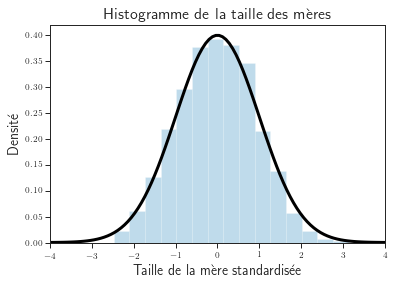

In [24]:
fig_hist_height, axs = plt.subplots(1, 1, figsize=(6, 4))

plt.hist((df_babies['ht'] - np.mean(df_babies['ht']))/sd,
         density=True, bins=19, alpha=0.25)  # standardisation
x = np.linspace(-4, 4, 100)
plt.xlabel('Taille de la mère standardisée', **axis_font)
plt.ylabel('Densité', **axis_font)
plt.title("Histogramme de la taille des mères", **title_font)
axs.set_xlim(-4, 4)

plt.plot(x, norm.pdf(x, 0, 1), 'k-', lw=3)
my_saving_display(fig_hist_height, dirname,
                  "hist_n_gauss_height_mother", imageformat, saving=saving)

## <font color='red'> EXERCICE : Histogramme vs. KDE. </font>
Compare l'impact des deux representations. En particulier, discuter les problèmes des histogrammes avec la discrétisation.

In [25]:
def kde_explore(bw=5):

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    # KDE = Kernel Density Estimate
    ax = sns.kdeplot(df_babies['ht'], bw=bw, shade=True)
    plt.xlabel('Taille de la mère (en cm)', **axis_font)
    plt.ylabel('Proportion', **axis_font)
    plt.title("Densité de la taille des mères", **title_font)
    ax.get_legend().remove()
    ax.set_xlim(130, 200)
    ax.set_ylim(0, 0.11)

In [26]:
# Change the first and second value to check more quantiles
interact(kde_explore, bw=(0.001, 10, 0.1))

interactive(children=(FloatSlider(value=5.0, description='bw', max=10.0, min=0.001), Output()), _dom_classes=(…

<function __main__.kde_explore(bw=5)>

In [27]:
def hist_explore(n_bins=24):

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.hist(df_babies['ht'], density=True,
            bins=n_bins, alpha=0.25)  # standardization
    plt.xlabel('Taille de la mère (en cm)', **axis_font)
    plt.ylabel('Proportion', **axis_font)
    plt.title("Densité de la taille des mères", **title_font)
    ax.set_xlim(130, 200)
    ax.set_ylim(0, 0.11)

In [28]:
interact(hist_explore, n_bins=(1, 30, 1))  # change the first and second value to check more quantiles 

interactive(children=(IntSlider(value=24, description='n_bins', max=30, min=1), Output()), _dom_classes=('widg…

<function __main__.hist_explore(n_bins=24)>

Inspection des valeurs de la séries:

In [29]:
np.sort(df_babies['ht'].unique())

array([137.16, 147.32, 149.86, 152.4 , 154.94, 157.48, 160.02, 162.56,
       165.1 , 167.64, 170.18, 172.72, 175.26, 177.8 , 180.34, 182.88])

In [30]:
np.diff(np.sort(df_babies['ht'].unique()))  

array([10.16,  2.54,  2.54,  2.54,  2.54,  2.54,  2.54,  2.54,  2.54,
        2.54,  2.54,  2.54,  2.54,  2.54,  2.54])

C'est l'effet de la discretisation: les américains on notés les tailels de 2.54 cm en 2.54cm (unité?)

## Gaussiennes 2D

In [31]:
def covmat_to_scalar(sigma):
    """Convert covariance matrix to scalars."""
    sigmax = np.sqrt(sigma[0, 0])
    sigmay = np.sqrt(sigma[1, 1])
    sigmaxy = sigma[1, 0]
    return sigmax, sigmay, sigmaxy


def angle_scalar_to_covmat(theta, sig1, sig2):
    """Inverse function of the previous one."""
    rotation = np.zeros((2, 2))
    rotation[0, 0] = np.cos(theta)
    rotation[1, 0] = np.sin(theta)
    rotation[0, 1] = -np.sin(theta)
    rotation[1, 1] = np.cos(theta)
    sigma = rotation.dot(np.diag([sig1 ** 2, sig2 ** 2])).dot(rotation.T)
    return sigma

In [32]:
step = 200
mean_1 = [0, 0]
sig1 = np.sqrt(3)
xrange = 10
xx = np.linspace(-xrange, xrange, step)
yy = xx
Xg, Yg = np.meshgrid(xx, yy)

### Cas isotrope

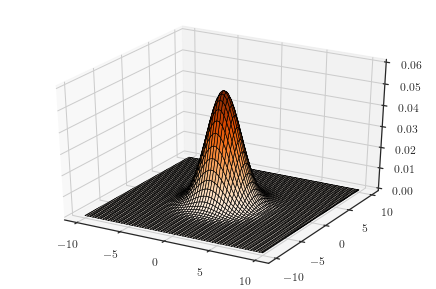

In [33]:
sig = angle_scalar_to_covmat(0, sig1, sig1)
rv = multivariate_normal([mean_1[0], mean_1[1]], sig)

pos = np.empty(Xg.shape + (2,))
pos[:, :, 0] = Xg; pos[:, :, 1] = Yg
Z2_bis = rv.pdf(pos) 

fig1 = plt.figure(dpi=90)
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(Xg, Yg, Z2_bis, cmap='Oranges', rstride=3, cstride=3,
                alpha=0.95, lw=0.5, edgecolors='k')

ax.set_xticks(np.arange(-xrange, xrange+1,5))
ax.set_yticks(np.arange(-xrange, xrange+1,5))

ax.set_zlim(0, 0.06)
plt.show()
my_saving_display(fig1, dirname, "iso_gaussian",imageformat, saving=saving)


### Cas anisotrope

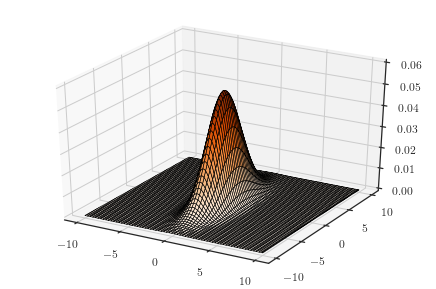

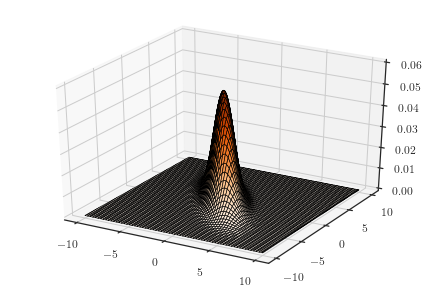

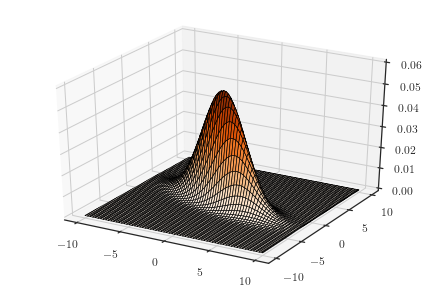

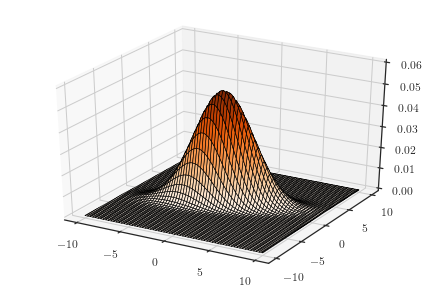

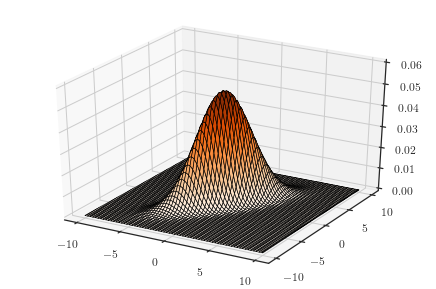

In [34]:
sig1 = 1.
sig2 = 3.
thetas = [0., np.pi / 5., 2. * np.pi / 5., 3. * np.pi / 5., 4. * np.pi / 5.]

for i, theta in enumerate(thetas):
    sig = angle_scalar_to_covmat(theta, sig1, sig2)
    rv = multivariate_normal([mean_1[0], mean_1[1]], sig)

    pos = np.empty(Xg.shape + (2,))
    pos[:, :, 0] = Xg
    pos[:, :, 1] = Yg
    Z2_ter = rv.pdf(pos)

    fig1 = plt.figure(dpi=90)
    ax = fig1.add_subplot(111, projection='3d')
    ax.plot_surface(Xg, Yg, Z2_ter, cmap='Oranges', rstride=3, cstride=3,
                    alpha=0.95, lw=0.5, edgecolors='k')
    ax.set_xticks(np.arange(-xrange, xrange+1, 5))
    ax.set_yticks(np.arange(-xrange, xrange+1, 5))
    ax.set_zlim(0, 0.06)
    plt.show()

    my_saving_display(fig1, dirname, "aniso_gaussian" +
                      str(i), imageformat, saving=saving)

In [35]:
def plot_Gaussian2d(theta=0, sig1=3, sig2=1):

    radian = theta / 180.0 * np.pi  # convertion en radian

    sig = angle_scalar_to_covmat(radian, sig1, sig2)
    rv = multivariate_normal([mean_1[0], mean_1[1]], sig)

    pos = np.empty(Xg.shape + (2,))
    pos[:, :, 0] = Xg
    pos[:, :, 1] = Yg
    Z2_ter = rv.pdf(pos)
    fig1 = plt.figure(dpi=90)
    ax = fig1.add_subplot(111, projection='3d')
    ax.plot_surface(Xg, Yg, Z2_ter, cmap='Oranges', rstride=3, cstride=3,
                    alpha=0.95, lw=0.5, edgecolors='k')
    ax.set_zlim(0, 0.06)
    ax.set_xticks(np.arange(-xrange, xrange+1, 5))
    ax.set_yticks(np.arange(-xrange, xrange+1, 5))

    plt.show()

In [36]:
interact(plot_Gaussian2d, theta=(0, 360, 10),
         sig1=(1, 5, 0.5), sig2=(1, 5, 0.5))

interactive(children=(IntSlider(value=0, description='theta', max=360, step=10), FloatSlider(value=3.0, descri…

<function __main__.plot_Gaussian2d(theta=0, sig1=3, sig2=1)>

In [37]:
def plot_Gaussian2d_bis(theta=60, sig1=4, sig2=2):

    radian = theta / 180.0 * np.pi  # convertion en radian

    sig = angle_scalar_to_covmat(radian, sig1, sig2)
    rv = multivariate_normal([mean_1[0], mean_1[1]], sig)

    pos = np.empty(Xg.shape + (2,))
    pos[:, :, 0] = Xg
    pos[:, :, 1] = Yg
    Z2_ter = rv.pdf(pos)

    fig1 = plt.figure(figsize=(17, 7))
    ax1 = fig1.add_subplot(121, projection='3d')
    ax1.plot_surface(Xg, Yg, Z2_ter, cmap='Oranges', rstride=3, cstride=3,
                     alpha=0.95, lw=0.5, edgecolors='k')
    ax1.set_zlim(0, 0.06)
    ax1.set_xticks(np.arange(-xrange, xrange+1, 5))
    ax1.set_yticks(np.arange(-xrange, xrange+1, 5))
    ax1.set_xlabel(r'$x$', **axis_font)
    ax1.set_ylabel(r'$y$', **axis_font)

    ax2 = fig1.add_subplot(122)
    ax2.set_xticks(np.arange(-xrange, xrange+1, 5))
    ax2.set_yticks(np.arange(-xrange, xrange+1, 5))
    ax2.contourf(xx, yy, Z2_ter, levels=10, cmap='Oranges')
    ax2.contour(xx, yy, Z2_ter, levels=10, linewidths=0.5, colors=['k'])
    ax2.set_xlabel(r'$x$', **axis_font)
    ax2.set_ylabel(r'$y$', **axis_font)
    ax2.set_title('Lignes de niveau de la densité', **title_font)
    ax2.set_aspect('equal')
    plt.show()

# Visualisation des densités gaussiennes en dimension 2:
On mesure ici l'impacte de la covariance (ici paramétré par un angle et des dispersions selon deux axes) sur ces densités.

In [38]:
interact(plot_Gaussian2d_bis, theta=(0, 360, 10),
         sig1=(0.5, 5, 0.5), sig2=(0.5, 5, 0.5))

interactive(children=(IntSlider(value=60, description='theta', max=360, step=10), FloatSlider(value=4.0, descr…

<function __main__.plot_Gaussian2d_bis(theta=60, sig1=4, sig2=2)>

**Remarque**: la figure de droite se lit comme une carte IGN, les lignes de niveau (zone de couleur constante) indique les zone d'altitude égale dans la figure de gauche. 

## Tirages gaussiens: cas 1D

In [39]:
n_samples = 1000
y = np.ones(n_samples,) + 0.08 * np.random.randn(n_samples,)
scales = [1, 3]

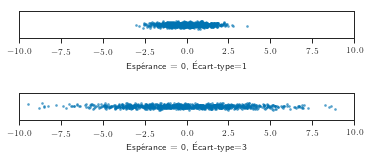

In [40]:
fig, axs = plt.subplots(len(scales), 1)

for i, ax in enumerate(axs):
    X = np.random.normal(loc=0, scale=scales[i], size=n_samples)  # std =3
    ax.scatter(X, y, s=3, marker='o', lw='1', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_ylim(0.2, 1.8)
    ax.set_xlim(-10, 10)
    ax.set_yticks([])
    ax.set_xlabel('Espérance = 0, Écart-type={}'.format(scales[i]))

plt.subplots_adjust(hspace = -0.4)
my_saving_display(fig, dirname, "gaussian_sample1D",
                  imageformat, saving=saving)

In [41]:
scales

[1, 3]

## Tirages gaussiens: cas 2D

In [42]:
mu = [0, 0]
Sigma0 = np.array([[3, 2], [2, 2.5]])
Sigmas = [Sigma0 * 2, Sigma0, Sigma0 * 0.5]
Sigmas_names = ['Variance élevée', 'Variance moyenne', 'Variance petite']

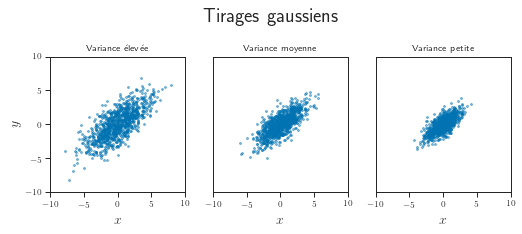

In [43]:
fig, axs = plt.subplots(1, len(Sigmas))
fig.set_size_inches(10, 3)
fig.suptitle('Tirages gaussiens', fontsize=20)
for i, ax in enumerate(axs):
    X = np.random.multivariate_normal(mu, Sigmas[i], n_samples)
    ax.scatter(X[:, 0], X[:, 1], s=4, alpha=0.5)

    ax.set_aspect('equal')
    ax.set_title(Sigmas_names[i])

    ax.set_ylim(-10, 10)
    ax.set_xlim(-10, 10)
    ax.set_xticks(np.arange(-xrange, xrange+1, 5))
    ax.set_yticks(np.arange(-xrange, xrange+1, 5))

    ax.set_xlabel(r'$x$', **axis_font)
    if i == 0:
        ax.set_ylabel(r'$y$', **axis_font)

    if i > 0:
        ax.set_yticks([])
plt.subplots_adjust(top=0.75, wspace = -0.3)
my_saving_display(fig, dirname, "gaussian_sample2D",
                  imageformat, saving=saving)

In [44]:
def plot_Gaussian2d_with_sample(theta=60, sig1=4, sig2=2, n_samples=1000):

    radian = theta / 180.0 * np.pi  # convertion en radian

    sig = angle_scalar_to_covmat(radian, sig1, sig2)
    rv = multivariate_normal([mean_1[0], mean_1[1]], sig)

    pos = np.empty(Xg.shape + (2,))
    pos[:, :, 0] = Xg
    pos[:, :, 1] = Yg
    Z2_ter = rv.pdf(pos)

    fig1 = plt.figure(figsize=(12, 12))

    # Densités gaussiennes (bidimensionnelles)
    
    ax1 = fig1.add_subplot(221, projection='3d')
    ax1.plot_surface(Xg, Yg, Z2_ter, cmap='Oranges', rstride=3, cstride=3,
                     alpha=0.95, lw=0.5, edgecolors='k')
    ax1.set_zlim(0, 0.06)
    ax1.set_xticks(np.arange(-xrange, xrange+1, 5))
    ax1.set_yticks(np.arange(-xrange, xrange+1, 5))
    ax1.set_xlabel(r'$x$', **axis_font)
    ax1.set_ylabel(r'$y$', **axis_font)

    # Lignes de niveau de gaussiennes

    ax2 = fig1.add_subplot(224)
    ax2.set_xticks(np.arange(-xrange, xrange+1, 5))
    ax2.set_yticks(np.arange(-xrange, xrange+1, 5))
    ax2.contourf(xx, yy, Z2_ter, levels=10, cmap='Oranges')
    ax2.contour(xx, yy, Z2_ter, levels=10, linewidths=0.5, colors=['k'])
    ax2.set_xlabel(r'$x$', **axis_font)
    ax2.set_ylabel(r'$y$', **axis_font)
    ax2.set_title('Lignes de niveau de la densité', **title_font)
    ax2.set_aspect('equal')

    # Tirages gaussiens

    ax3 = fig1.add_subplot(223)
    X = np.random.multivariate_normal([0, 0], sig, n_samples)
    ax3.scatter(X[:, 0], X[:, 1], s=4, alpha=0.5)
    ax3.set_aspect('equal')
    ax3.set_xlim(-xrange, xrange)
    ax3.set_ylim(-xrange, xrange)
    ax3.set_xlabel(r'$x$', **axis_font)
    ax3.set_ylabel(r'$y$', **axis_font)
    ax3.set_title('Tirages gaussiens', **title_font)


In [45]:
interact(plot_Gaussian2d_with_sample, theta=(0, 360, 10),
         sig1=(0.5, 5, 0.5), sig2=(0.5, 5, 0.5), n_sample=(1, 2000, 10))

interactive(children=(IntSlider(value=60, description='theta', max=360, step=10), FloatSlider(value=4.0, descr…

<function __main__.plot_Gaussian2d_with_sample(theta=60, sig1=4, sig2=2, n_samples=1000)>

## QQ-plots

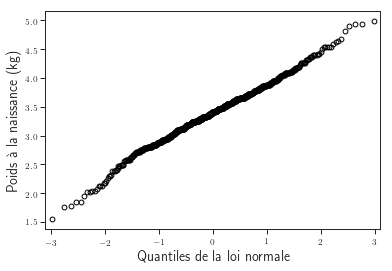

In [46]:
import statsmodels.api as sm
fig = sm.qqplot(df_babies['wt'], norm, c='k', fillstyle='none')
plt.ylabel("Poids à la naissance (kg)", **axis_font)
plt.xlabel("Quantiles de la loi normale", **axis_font)
my_saving_display(fig, dirname, "qqplot", imageformat, saving=saving)

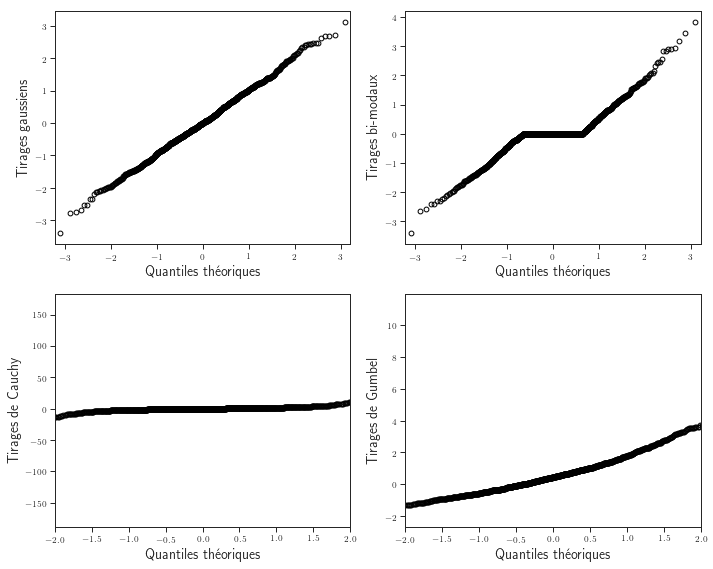

In [47]:
left = -1.8  # x coordinate for text insert
n_samples = 1000

fig = plt.figure()
fig.set_size_inches(10, 8)

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(np.random.randn(n_samples), fillstyle='none', c='k', ax=ax)
top = ax.get_ylim()[1] * 0.75
ax.set_ylabel("Tirages gaussiens", **axis_font)
ax.set_xlabel("Quantiles théoriques", **axis_font)


coin = (2 * np.random.rand(n_samples) - 1) > 0.
ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(coin * np.random.randn(n_samples),
                   fillstyle='none', c='k', ax=ax)
top = ax.get_ylim()[1] * 0.75
ax.set_ylabel("Tirages bi-modaux", **axis_font)
ax.set_xlabel("Quantiles théoriques", **axis_font)

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.random.standard_cauchy(
    n_samples), fillstyle='none', c='k', ax=ax)
ax.set_xlim(-2, 2)
top = ax.get_ylim()[1] * 0.75
ax.set_ylabel("Tirages de Cauchy", **axis_font)
ax.set_xlabel("Quantiles théoriques", **axis_font)


ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.random.gumbel(0, 1, n_samples),
                   c='k', fillstyle='none', ax=ax)
ax.set_xlim(-2, 2)
top = ax.get_ylim()[1] * 0.75
ax.set_ylabel("Tirages de Gumbel", **axis_font)
ax.set_xlabel("Quantiles théoriques", **axis_font)


plt.tight_layout()
my_saving_display(fig, dirname, "qqplots", imageformat, saving=saving)